In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Manufacture 2030

This notebook serves as a proceeding analysis after Excel and Tableau analysis.

The previous analysis can be summarized as follow:



Let's load and have a look at the main dataframe we will be working with.

In [130]:
sales_df = pd.read_csv('manufacture_sales.csv')
sales_df.head()

/home/shiya/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country
0,1450,Quibus RP-42,Urban,21-Sep-17,2730,5,726.6000,£145.32,£152.15,-£6.83,Quibus,12,Mexico
1,1449,Quibus RP-41,Urban,21-Sep-17,2730,5,726.6000,£145.32,£152.15,-£6.83,Quibus,12,Mexico
2,780,Natura RP-68,Rural,28-Feb-19,7007,9,3023.5275,£335.95,£389.03,-£53.08,Natura,8,Australia
3,780,Natura RP-68,Rural,8-Jun-17,1781,19,5984.0025,£314.95,£389.03,-£74.08,Natura,8,Australia
4,396,Maximus UM-01,Urban,8-Sep-19,2103,8,7562.1000,£945.26,£950.51,-£5.25,VanArsdel,7,Australia


## Data types conversion

Since we have processed the data before in Excel, there may be some issues with the data type mismatches. Indeed, from the above peek into the dataset, we can see that the some of the currency columns contain the symbol "£", which indicates that the columns are saved as string types in our dataset.

Let's have a look at the summary of the dataframe.

In [131]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101742 entries, 0 to 101741
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ProductID           101742 non-null  int64  
 1   Product name        101742 non-null  object 
 2   Product Category    101742 non-null  object 
 3   Date                101742 non-null  object 
 4   Zip                 101742 non-null  object 
 5   Units               101742 non-null  int64  
 6   Revenue             101742 non-null  float64
 7   Revenue per unit    101742 non-null  object 
 8   MSRP (USD)          101742 non-null  object 
 9   Revenue minus MSRP  101742 non-null  object 
 10  Manufacturer        101742 non-null  object 
 11  Manufacturer ID     101742 non-null  int64  
 12  Country             101742 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 10.1+ MB


Other than the currency data type mismatches, we also observe that the "Date" column is also saved as a string type, since we will mainly be working with time-series analysis in this notebook, it is crucial to convert the "Date" column in to a pandas' DateTime object.

In [132]:
# Converting Date column in to Datetime Object.
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

Now we will attempt to convert the currency columns into float data type.

In [133]:
# Defining helper function to convert specific currency column.
def currency_to_float(df, col_name):
    # Using pd.Series.replace method to replace "£" and "," symbol to empty string,
    # we will be using regex r-string to search for the sumbol

    if df[col_name].dtype.kind == 'f':
        print(f"{col_name} is already a float type")
        return

    print(f"converting {col_name} column in {df=}".split('=')[0], " dataframe into float column...")
    df[col_name] = df[col_name].str.replace(r'[£,]', '', regex = True).astype('float')
    assert df[col_name].dtype.kind == 'f'
    print('Convert successful!\n')

In [134]:
for col in ['Revenue per unit', 'MSRP (USD)', 'Revenue minus MSRP']:

    currency_to_float(sales_df, col)

converting Revenue per unit column in df  dataframe into float column...
Convert successful!

converting MSRP (USD) column in df  dataframe into float column...
Convert successful!

converting Revenue minus MSRP column in df  dataframe into float column...
Convert successful!



As a final check, let's check the data types of the dataframe.

In [135]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101742 entries, 0 to 101741
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ProductID           101742 non-null  int64         
 1   Product name        101742 non-null  object        
 2   Product Category    101742 non-null  object        
 3   Date                101742 non-null  datetime64[ns]
 4   Zip                 101742 non-null  object        
 5   Units               101742 non-null  int64         
 6   Revenue             101742 non-null  float64       
 7   Revenue per unit    101742 non-null  float64       
 8   MSRP (USD)          101742 non-null  float64       
 9   Revenue minus MSRP  101742 non-null  float64       
 10  Manufacturer        101742 non-null  object        
 11  Manufacturer ID     101742 non-null  int64         
 12  Country             101742 non-null  object        
dtypes: datetime64[ns](1), float64

In [136]:
sales_df.head()

,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country
0,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico
1,1449,Quibus RP-41,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico
2,780,Natura RP-68,Rural,2019-02-28,7007,9,3023.5275,335.95,389.03,-53.08,Natura,8,Australia
3,780,Natura RP-68,Rural,2017-06-08,1781,19,5984.0025,314.95,389.03,-74.08,Natura,8,Australia
4,396,Maximus UM-01,Urban,2019-09-08,2103,8,7562.1000,945.26,950.51,-5.25,VanArsdel,7,Australia


## Null values

In [137]:
sales_df.isnull().sum()

ProductID             0
Product name          0
Product Category      0
Date                  0
Zip                   0
Units                 0
Revenue               0
Revenue per unit      0
MSRP (USD)            0
Revenue minus MSRP    0
Manufacturer          0
Manufacturer ID       0
Country               0
dtype: int64

## EDA

### MSRP analysis

We are first interested in the difference between the selling price and the manufacturer's suggested retail price (MSRP). By inspecting this varaible, we might gain some insight regarding if any modification of MSRP has to be modified, or if there is any fluctuation in the market, resulting is a high differnce in between the selling prices and MSRP (eg, demand is higher than supplies, resulting in the increase in final selling prices.)

In [138]:
sales_df['Revenue minus MSRP'].describe()

count    101742.000000
mean       -141.916441
std         224.444301
min        -871.870000
25%         -88.780000
50%         -39.900000
75%         -23.680000
max           0.000000
Name: Revenue minus MSRP, dtype: float64

We can see that every sellers has set the selling price to be lower than the MSRP, which is slightly unlikely. However, the more concerning statistics is the minimum values of the difference. Indicating that some sellers were willing to sell the product with less than $842, likely resulting in a loss in profit.

Let's have a look at the distributions from the data. We have speculate that the distribution should be close to a normal distribution, as sellers are likely to take the MSRPs as a baseline for the selling price.

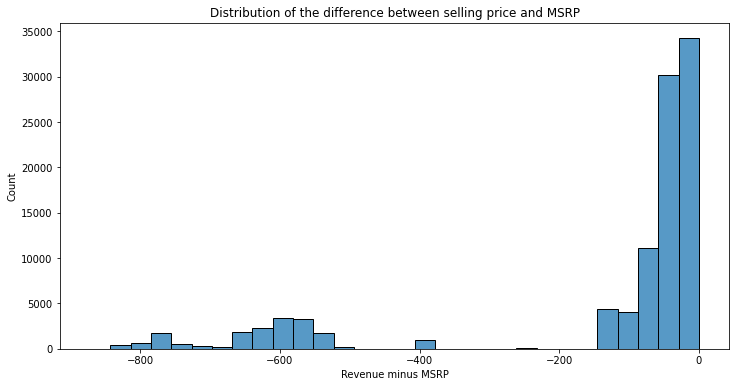

In [139]:
plt.figure(figsize=(12, 6))
sns.histplot(sales_df['Revenue minus MSRP'], bins=30)
plt.title('Distribution of the difference between selling price and MSRP')
plt.show()

From the above figure, we can see that the distribution seems to consists of 2 normal distibutions (centered around -700 and -600) and a skewed distribution towards 0.

In order to determine the contributors of the normal distributions, let's break down the distributinos by the product categories, perhaps this will give us some insight on the relation between product types and selling prices.

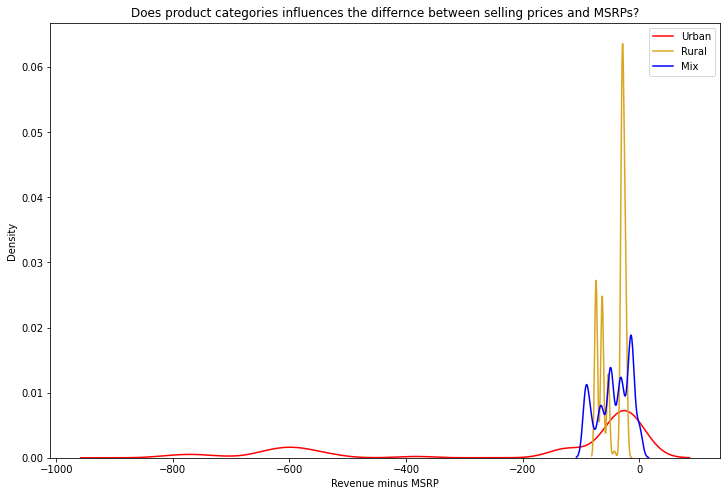

In [140]:
plt.figure(figsize=(12, 8))
for i, color in zip(sales_df['Product Category'].unique(), ['r', 'goldenrod', 'blue']):
    sns.kdeplot(sales_df[sales_df['Product Category'] == i]['Revenue minus MSRP'], 
                color=color, label = i)
plt.legend()
plt.title('Does product categories influences the differnce between selling prices and MSRPs?')
plt.show()

We have observed an interesting pattern that "Urban" product types are much likely to be set at a lower selling price. However, this results could arise from the different scale in the revenue price of different product categories.

To minimized the effect of the scales, let's have a look at the distributions of revenues for different product types.

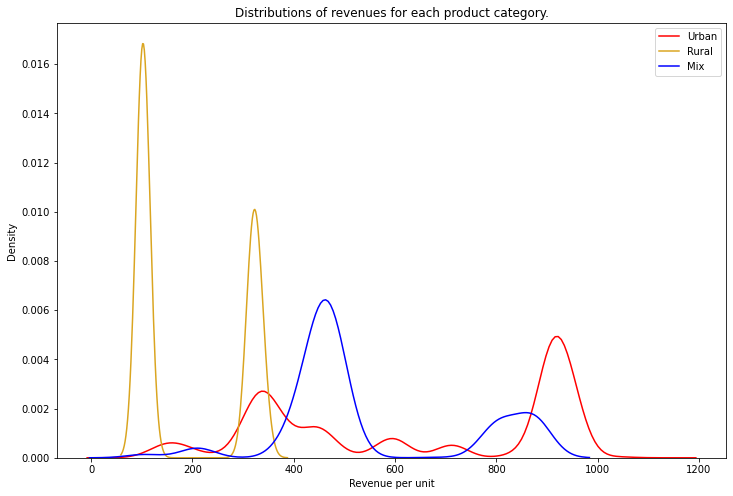

In [141]:

plt.figure(figsize=(12, 8))
for i, color in zip(sales_df['Product Category'].unique(), ['r', 'goldenrod', 'blue']):
    sns.kdeplot(sales_df[sales_df['Product Category'] == i]['Revenue per unit'], 
                color=color, label = i)
plt.legend()
plt.title('Distributions of revenues for each product category.')
plt.show()

Indeed, the urban products has a highly scale of prices, however, the differnce wasn't too significant such that it would contribute much for the variable. 

> It's also worth noting that the revenues resemble a multinomial distribution, without knowing what the products types represents, we can only have an educated guess at this point. Further data collected should consists of the sub-categories of transaction, in order that deeper analysis could be performed.

In order to minimized the effect of product price' scale , we will normalized the price-MSRP difference by dividing the difference with the selling price.

In [142]:
sales_df['revenue-MSRP difference in fraction'] = sales_df['Revenue minus MSRP']/sales_df['Revenue per unit']
sales_df.head()

,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country,revenue-MSRP difference in fraction
0,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
1,1449,Quibus RP-41,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
2,780,Natura RP-68,Rural,2019-02-28,7007,9,3023.5275,335.95,389.03,-53.08,Natura,8,Australia,-0.158000
3,780,Natura RP-68,Rural,2017-06-08,1781,19,5984.0025,314.95,389.03,-74.08,Natura,8,Australia,-0.235212
4,396,Maximus UM-01,Urban,2019-09-08,2103,8,7562.1000,945.26,950.51,-5.25,VanArsdel,7,Australia,-0.005554


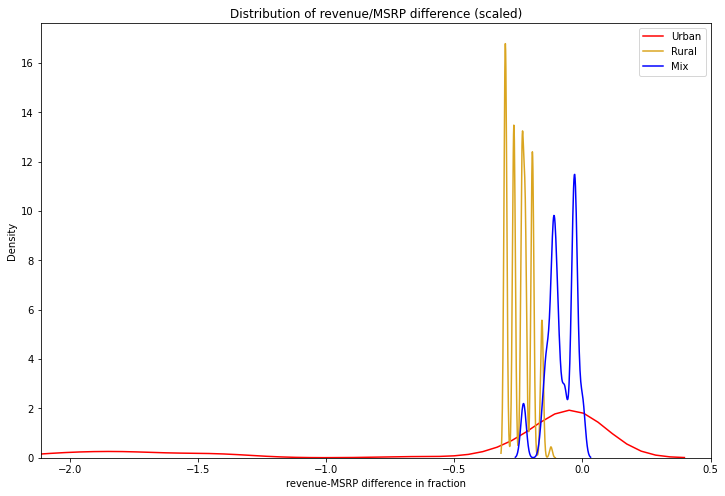

In [143]:

plt.figure(figsize=(12, 8))
for i, color in zip(sales_df['Product Category'].unique(), ['r', 'goldenrod', 'blue']):
    sns.kdeplot(sales_df[sales_df['Product Category'] == i]['revenue-MSRP difference in fraction'], 
                color=color, label = i)
plt.legend()
plt.title('Distribution of revenue/MSRP difference (scaled)')
plt.xlim((sales_df['revenue-MSRP difference in fraction'].quantile(0.05), 
            sales_df['revenue-MSRP difference in fraction'].max() + 0.5))
plt.show()

Even after scaling the difference as fraction, we still observe the urban products were likely to priced as lower suggested price as MSRP. 

Possible reasons are as follows:
* Manufacturers of urban products failed to estimate a MSRP prices reflecting the market values.
* Sellers had stocked abundant urban products, resulting in lower final selling prices due to discounts, clearance etc.

### Time-series analysis 

In this section, we aim to examine the consistency of data entry, by examining the date of trasactions. It is possible that the data entries was biased, and not all transactions had been recorded. However, this results is impossible to determine, (if we have the knowledge of missing entries, it won't be a missing entries in the begining). This problem resembles the issue of [survivor bias](https://en.wikipedia.org/wiki/Survivorship_bias), and we aim to examing the absents of data entries instead.

In [144]:
# Resample the dataframe, resulting each row as a day
# Aggregation function of count was used, each values representing the number of transaction recorded
# in each day.
sales_time_df = sales_df.set_index('Date')[['ProductID']].resample('d').count()

# Converting the values as 1 if any transaction was recorded, 0 otherwise
sales_time_df['ProductID'] = sales_time_df.apply(lambda x: 1 if x['ProductID'] > 0 else 0, axis = 1)
sales_time_df.index = sales_time_df.index.strftime('%Y-%m-%d')

Let's have a look at the distributions:

Out of 1095 days recorded, only 12 days were absent.

In [145]:
sales_time_df.value_counts()

ProductID
1            1083
0              12
dtype: int64

In [146]:

sales_time_df.value_counts(normalize=True)

ProductID
1            0.989041
0            0.010959
dtype: float64

Which rougly translates to 1% of missing data.

In [147]:
sales_time_df[sales_time_df['ProductID'] == 0]

,ProductID
Date,
2017-01-04,0
2017-01-11,0
2017-01-18,0
2017-02-08,0
2017-02-22,0
2017-07-11,0
2017-07-18,0
2017-07-25,0
2017-08-01,0


<AxesSubplot:xlabel='ProductID'>

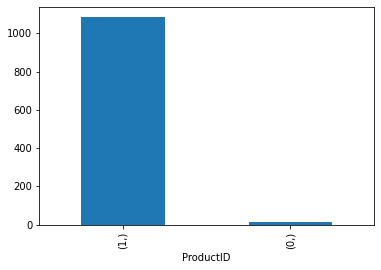

In [148]:

sales_time_df.value_counts().plot(kind='bar')

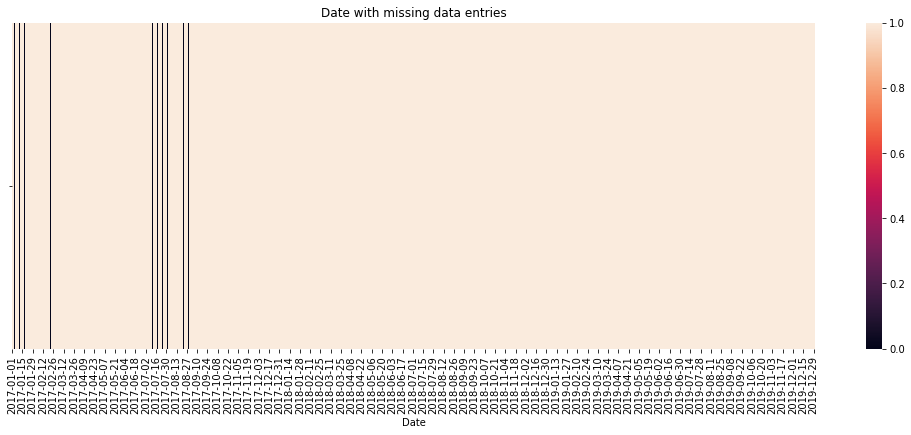

In [149]:
plt.figure(figsize = (18, 6))
s = sns.heatmap(sales_time_df.T, yticklabels=[''])
plt.title('Date with missing data entries')
plt.show()


From the heatmap above, we fail to observe outstanding pattern that indicates that the missing of data entries was due to mistake in data entries. The evenly spaced date from 2017-07-16 to 2017-08-27 does raise some concerns, however, we do not possess enough evidence in proving the claim.


Now that we have investigate the missing data entries, let's have a look at the exact counts by dates.

In [150]:
# Resampling the dataframe to one day per row, aggregrating the values as the number of 
# transaction recoded in each day.
sales_time_count_df = sales_df.set_index('Date')[['ProductID']].resample('M').count()

# Extracting simpler date format
sales_time_count_df.index = sales_time_count_df.index.strftime('%Y-%m')
sales_time_count_df.head()

,ProductID
Date,
2017-01,2002
2017-02,2457
2017-03,3169
2017-04,3282
2017-05,3079


/home/shiya/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


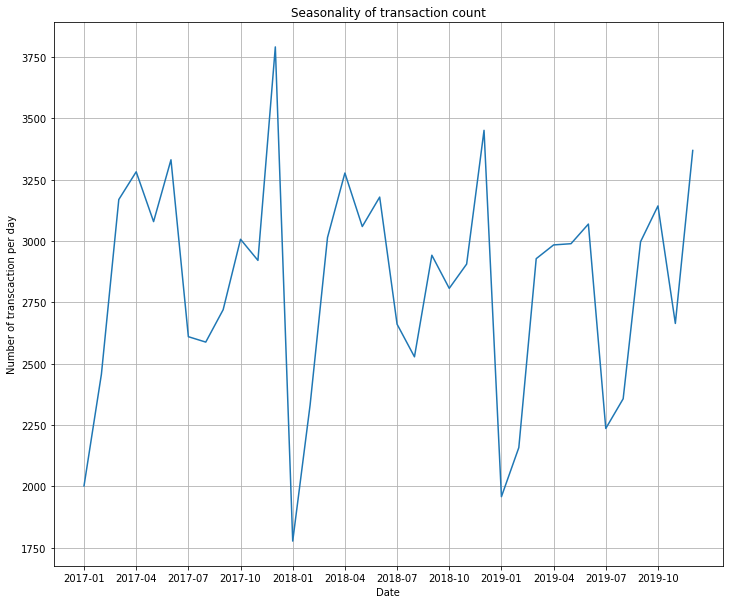

In [165]:
plt.figure(figsize= (12, 10))
sns.lineplot(sales_time_count_df.index, sales_time_count_df['ProductID'])
plt.xticks(sales_time_count_df.index[::3])
plt.grid(True)
plt.title('Seasonality of transaction count')
plt.ylabel('Number of transcaction per day')
plt.show()

From the figure above, we observe that thre is a reapeating pattern in the sales for each year, with number of transasction peaked around April and December, and the number of sales had a significant dips starting from July each year and January.

>> The seasonality of sales raise some questions regarding the data set, particularly:

* What sales data are we looking at, since most of the sales came from the US (from our previous [Tableau analysis](https://public.tableau.com/views/Manufacture_16758604899000/Revenuesgeneratedbycountries?:language=en-US&:display_count=n&:origin=viz_share_link)). The products sold were likely unpopular after gifting season (December - Christmas, April - Easter) 

In [152]:
sales_df.head()

,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country,revenue-MSRP difference in fraction
0,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
1,1449,Quibus RP-41,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
2,780,Natura RP-68,Rural,2019-02-28,7007,9,3023.5275,335.95,389.03,-53.08,Natura,8,Australia,-0.158000
3,780,Natura RP-68,Rural,2017-06-08,1781,19,5984.0025,314.95,389.03,-74.08,Natura,8,Australia,-0.235212
4,396,Maximus UM-01,Urban,2019-09-08,2103,8,7562.1000,945.26,950.51,-5.25,VanArsdel,7,Australia,-0.005554


In [153]:
!head -5 manufacture_geo.csv

Zip,City,State,Region,District,Country,,,
68274,,Oaxaca,,Oaxaca de Juarez,Mexico,,,
68275,,Oaxaca,,Oaxaca de Juarez,Mexico,,,
68276,,Oaxaca,,Oaxaca de Juarez,Mexico,,,Unique number of Cities:
71512,,Oaxaca,,Ocotlan de Morelos,Mexico,,,90394


In [154]:
import chardet

with open('manufacture_geo.csv', 'rb') as file:
    result = chardet.detect(file.read())

result['encoding']

'ISO-8859-1'

In [155]:
geo_df = pd.read_csv('manufacture_geo.csv', usecols=list(range(6)), encoding='ISO-8859-1')
geo_df.head()

/home/shiya/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Zip,City,State,Region,District,Country
0,68274,NaN,Oaxaca,NaN,Oaxaca de Juarez,Mexico
1,68275,NaN,Oaxaca,NaN,Oaxaca de Juarez,Mexico
2,68276,NaN,Oaxaca,NaN,Oaxaca de Juarez,Mexico
3,71512,NaN,Oaxaca,NaN,Ocotlan de Morelos,Mexico
4,71513,NaN,Oaxaca,NaN,Ocotlan de Morelos,Mexico


In [156]:
sales_df.head()

,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country,revenue-MSRP difference in fraction
0,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
1,1449,Quibus RP-41,Urban,2017-09-21,2730,5,726.6000,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047000
2,780,Natura RP-68,Rural,2019-02-28,7007,9,3023.5275,335.95,389.03,-53.08,Natura,8,Australia,-0.158000
3,780,Natura RP-68,Rural,2017-06-08,1781,19,5984.0025,314.95,389.03,-74.08,Natura,8,Australia,-0.235212
4,396,Maximus UM-01,Urban,2019-09-08,2103,8,7562.1000,945.26,950.51,-5.25,VanArsdel,7,Australia,-0.005554


In [157]:
sales_df = sales_df.merge(geo_df[[col for col in geo_df.columns if col != 'Country']], 
                left_on='Zip', right_on='Zip', how='left')
sales_df.head(2)

,ProductID,Product name,Product Category,Date,Zip,Units,Revenue,Revenue per unit,MSRP (USD),Revenue minus MSRP,Manufacturer,Manufacturer ID,Country,revenue-MSRP difference in fraction,City,State,Region,District
0,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047,Batlow,New South Wales,NaN,CANBERRA
1,1450,Quibus RP-42,Urban,2017-09-21,2730,5,726.6,145.32,152.15,-6.83,Quibus,12,Mexico,-0.047,Ciudad de Mexico,Distrito Federal,NaN,Azcapotzalco


In [175]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128712 entries, 0 to 128711
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ProductID                            128712 non-null  int64         
 1   Product name                         128712 non-null  object        
 2   Product Category                     128712 non-null  object        
 3   Date                                 128712 non-null  datetime64[ns]
 4   Zip                                  128712 non-null  object        
 5   Units                                128712 non-null  int64         
 6   Revenue                              128712 non-null  float64       
 7   Revenue per unit                     128712 non-null  float64       
 8   MSRP (USD)                           128712 non-null  float64       
 9   Revenue minus MSRP                   128712 non-null  float64       
 

In [179]:
sales_df.pivot_table(values='ProductID', index='Country', columns='State', aggfunc='count').T

Country,Australia,Canada,Germany,Japan,Mexico,Nigeria,USA
State,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,122.0
AL,NaN,NaN,NaN,NaN,NaN,NaN,577.0
AR,NaN,NaN,NaN,NaN,NaN,NaN,297.0
AZ,NaN,NaN,NaN,NaN,NaN,NaN,819.0
Aguascalientes,NaN,NaN,3.0,NaN,NaN,NaN,117.0
...,...,...,...,...,...,...,...
WY,NaN,NaN,NaN,NaN,NaN,NaN,119.0
Western Australia,3888.0,NaN,NaN,NaN,NaN,NaN,305.0
Yamaguchiken,NaN,NaN,NaN,60.0,NaN,NaN,NaN


In [193]:
country_df = sales_df.groupby(['Country', 'State'])[['ProductID']].count(). \
    sort_values(['Country', 'ProductID'], ascending=False)
country_df.head()

ProductID
Country State                    
USA     CA                   5620
        FL                   2173
        TX                   2065
        Veracruz Llave       1758
        Bayern               1132

In [200]:
aust_df = country_df[[x[0] == 'Australia' for x in country_df.index]]
aust_df

ProductID
Country   State                                  
Australia New South Wales                   11711
          Victoria                           9545
          Queensland                         6031
          Distrito Federal                   4851
          South Australia                    4466
          Western Australia                  3888
          MA                                 3237
          CT                                 1848
          Tasmania                           1113
          Sachsen                            1082
          VT                                  783
          Northern Territory                  713
          Sachsen-Anhalt                      676
          Australian Capital Territory        521
          NJ                                  508
          RI                                  493
          Brandenburg                         335
          NH                                  270
          Thüringen                            99
          NY                                   24